## Observations and Insights

## Dependencies and starter code

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results,how='outer',on='Mouse ID')
combined_df.to_csv("data/combined.csv", index=False, header=True)
# combined_df.head(20)

## Summary statistics

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_stats = combined_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})
summary_stats.columns = ['Mean', 'Median', 'Variance','Standard Deviation','Standard Error of Mean']

summary_stats.head()



,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar plots

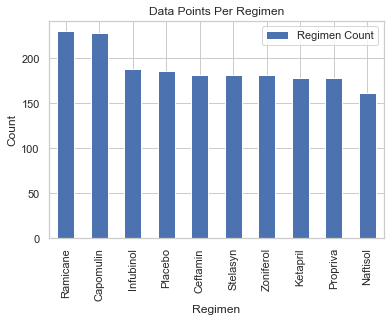

In [45]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Get counts per regimen
regimen_count = combined_df['Drug Regimen'].value_counts()
regimen = [reg for reg in combined_df['Drug Regimen'].unique()]

df = pd.DataFrame({
    "Regimen": regimen,
    "Regimen Count": regimen_count
})

fig,ax = plt.subplots()
df.plot.bar(x="Regimen", y="Regimen Count", ax=ax)
ax.set(title="Data Points Per Regimen", xlabel = "Regimen", ylabel="Count")
ax.legend()

Text(0, 0.5, 'Count')

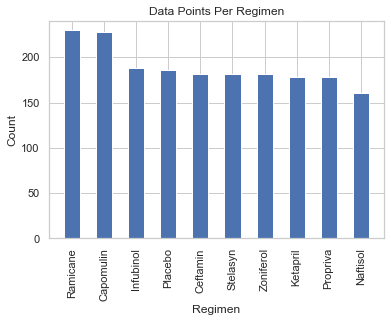

In [46]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(regimen, regimen_count,linewidth=1,align="center",width=0.5)
plt.xticks(rotation=90)
plt.ylim(0, max(regimen_count)+10)

plt.title("Data Points Per Regimen")
plt.xlabel("Regimen")
plt.ylabel("Count")


## Pie plots

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

In [49]:
combined_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Quartiles, outliers and boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

promising_regimens_df = combined_df.loc[combined_df['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
promising_regimens_df = promising_regimens_df.loc[promising_regimens_df['Timepoint'] == 45]
promising_regimens_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0
94,j913,Ramicane,Female,4,17,45,31.560470,1
104,u364,Capomulin,Male,18,17,45,31.023923,3


### Remicane Quartiles and outliers

In [56]:

ramicane_regimens_df = promising_regimens_df.loc[promising_regimens_df['Drug Regimen'].isin(['Ramicane'])]
ramicane = ramicane_regimens_df['Tumor Volume (mm3)']
quartiles = ramicane.quantile([.25,.5,.75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Ramicane is: 30.981175224999998
The upper quartile of Ramicane is: 38.508305307499995
The interquartile range of Ramicane is: 7.527130082499998
The the median of Ramicane is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


### Capomulin Quartiles and outliers

In [57]:

capomulin_regimens_df = promising_regimens_df.loc[promising_regimens_df['Drug Regimen'].isin(['Capomulin'])]
capomulin = capomulin_regimens_df['Tumor Volume (mm3)']
quartiles = capomulin.quantile([.25,.5,.75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The interquartile range of capomulin is: {iqr}")
print(f"The the median of capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The interquartile range of capomulin is: 7.781863460000004
The the median of capomulin is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


### Infubinol Quartiles and outliers

In [55]:
infubinol_regimens_df = promising_regimens_df.loc[promising_regimens_df['Drug Regimen'].isin(['Infubinol'])]
infubinol = infubinol_regimens_df['Tumor Volume (mm3)']
quartiles = infubinol.quantile([.25,.5,.75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The interquartile range of Infubinol is: 4.9311172099999965
The the median of Infubinol is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


### Ceftamin Quartiles and outliers

In [58]:
ceftaminl_regimens_df = promising_regimens_df.loc[promising_regimens_df['Drug Regimen'].isin(['Ceftamin'])]
ceftaminl = ceftaminl_regimens_df['Tumor Volume (mm3)']
quartiles = ceftaminl.quantile([.25,.5,.75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The interquartile range of Ceftamin is: 6.093590140000003
The the median of Ceftamin is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


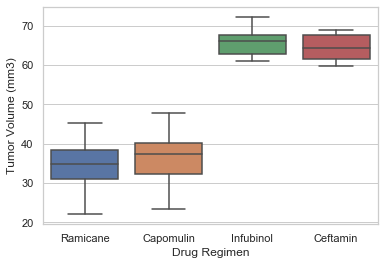

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
sns.set(style="whitegrid")
ax = sns.boxplot(x="Drug Regimen", y="Tumor Volume (mm3)", data=promising_regimens_df)

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen